In [ ]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import ast

# Reading DF from .csv

In [ ]:
daily_stats = pd.read_csv('daily_stats_user.csv', lineterminator='\n', index_col=0)

### Converting str time series into array

In [ ]:
daily_stats['success_ts'] = daily_stats.success_ts.apply(ast.literal_eval)


In [ ]:
X_bot = []
X_nonbot = []

for row in daily_stats.itertuples():
    if row.bot == 1:
        X_bot.append(np.array(row.success_ts)) 
    elif row.bot == 0:
        X_nonbot.append(np.array(row.success_ts))

X_nonbot = np.array(X_nonbot)

X_bot = np.array(X_bot)

X = np.concatenate((X_bot, X_nonbot))

#### Correction of distortion to use euclidean distance

In [ ]:
X_mean_nonbot = X_nonbot.copy()
for i in range(X_nonbot.shape[0]):
    X_mean_nonbot[i] = (X_nonbot[i] - X_nonbot[i].mean())/X_nonbot[i].std()

X_mean_bot = X_bot.copy()
for i in range(X_bot.shape[0]):
    X_mean_bot[i] = (X_bot[i] - X_bot[i].mean())/X_bot[i].std()

In [129]:
model = TimeSeriesKMeans()

### Finding K for people

In [131]:
visualizer_people = KElbowVisualizer(model, k=(1,16))

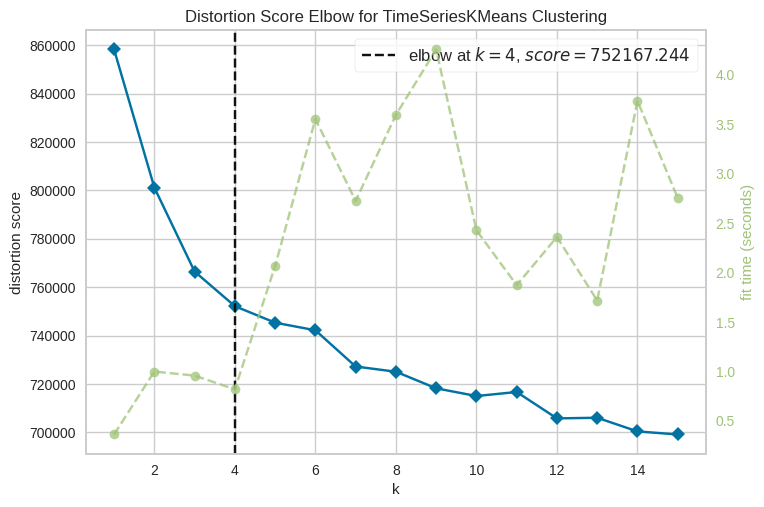

<AxesSubplot: title={'center': 'Distortion Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
visualizer_people.fit(X_mean_nonbot) # Fit the data to the visualizer
visualizer_people.show()  

### Clustering people

In [134]:
km_nonbots = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=10, random_state=0)
km_nonbots.fit(X_mean_nonbot)

TimeSeriesKMeans(max_iter=10, n_clusters=4, random_state=0)

###### Plot clusters centroids

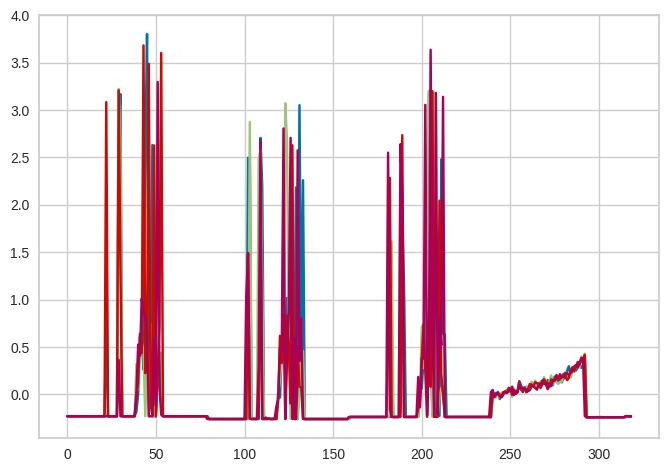

In [135]:
plt.plot(km_nonbots.cluster_centers_.reshape(X_mean_nonbot.shape[1], 4))
plt.show()

In [136]:
km_nonbots.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [137]:
unique, counts = np.unique(km_nonbots.labels_, return_counts=True)

In [138]:
print(counts)

[ 283  445  239 1945]


In [ ]:
plot_array = []
for j in range(len(counts)):
    t_plot=[]
    for i,elem in enumerate(km_nonbots.labels_):
        if elem == j:
            t_plot.append(X_mean_nonbot[i])

    t_plot = np.array(t_plot)
    plot_array.append(t_plot)
    
for j in range(len(counts)):
    plt.figure(figsize = (16,9))
    for i in range(plot_array[j].shape[0]):
        plt.plot(plot_array[j][i])
    plt.show()

### Finding K for bots

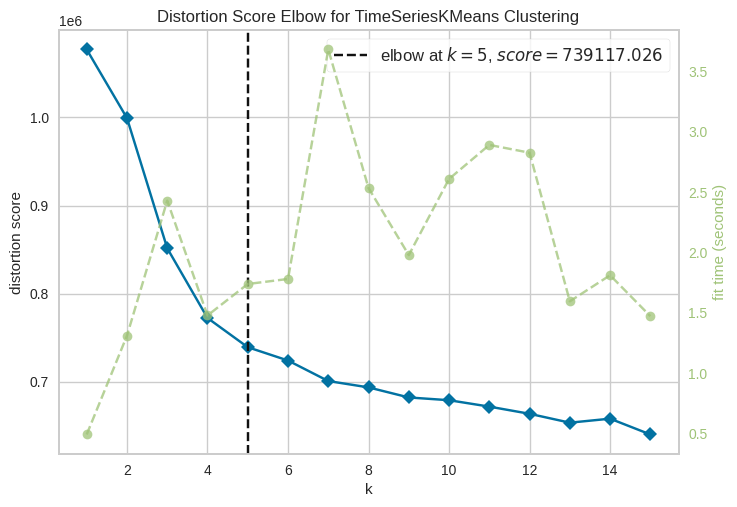

<AxesSubplot: title={'center': 'Distortion Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
visualizer_bot = KElbowVisualizer(model, k=(1,16))
visualizer_bot.fit(X_mean_bot) # Fit the data to the visualizer
visualizer_bot.show()  

### Clustering bots

In [141]:
km_bots = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=10, random_state=0)
km_bots.fit(X_mean_bot)

TimeSeriesKMeans(max_iter=10, n_clusters=5, random_state=0)

###### Plot clusters centroids

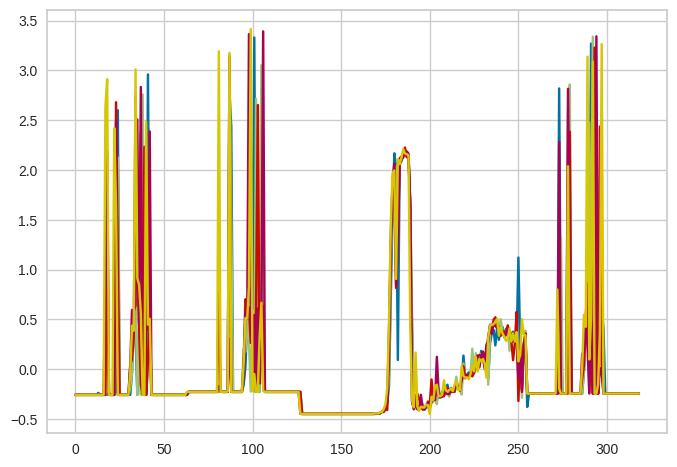

In [142]:
plt.plot(km_bots.cluster_centers_.reshape(X_mean_bot.shape[1], 5))
plt.show()

In [ ]:
km_bots.labels_

In [143]:
unique, counts = np.unique(km_bots.labels_, return_counts=True)

In [144]:
print(counts)

[1024  660  409 1183  596]


In [ ]:
plot_array = []
for j in range(len(counts)):
    t_plot=[]
    for i,elem in enumerate(km_bots.labels_):
        if elem == j:
            t_plot.append(X_mean_bot[i])

    t_plot = np.array(t_plot)
    plot_array.append(t_plot)
    
for j in range(len(counts)):
    plt.figure(figsize = (16,9))
    for i in range(plot_array[j].shape[0]):
        plt.plot(plot_array[j][i])
    plt.show()